In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='fare', ylabel='age'>

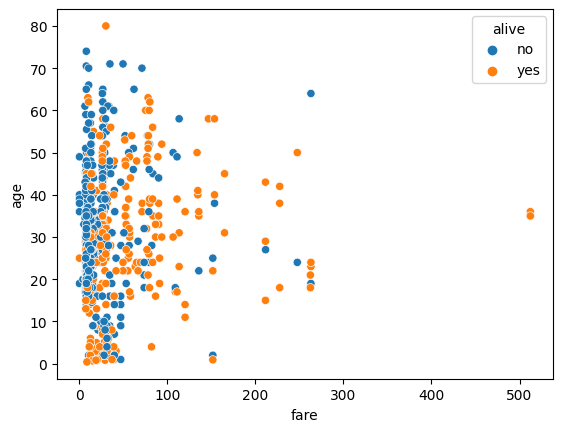

In [ ]:
sns.scatterplot(x=df["fare"], y=df["age"], hue = df['alive'], markers = True )

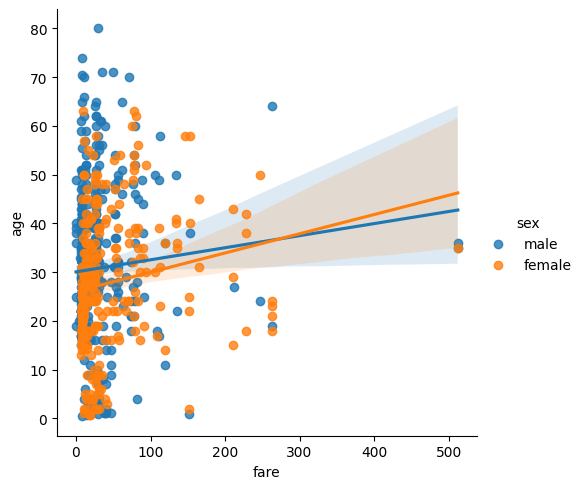

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(data=df, x='fare', y='age', hue='sex')

In [ ]:
df.shape

(891, 15)

# Limpieza de Datos
## Eliminación y Sustitución de Valores Nulos
En primer lugar, verificaremos si existen valores nulos en el dataset:

In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Podemos observar que existen valores nulos en las columnas 'age', 'deck' y 'embark_town'.

Podemos eliminar la columna 'deck' ya que contiene muchos valores nulos y no es relevante para nuestro análisis. Además, eliminaremos la columna 'embark_town' porque ya tenemos la información en la columna 'embarked'.

In [ ]:
df2 = df.sort_values(by='age', ascending=False, na_position='first')
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True


In [ ]:
df2 = df2.drop(['deck', 'embark_town'], axis=1)

In [ ]:
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True


En cuanto a la columna 'age', podemos sustituir los valores nulos por la mediana de la columna:

In [ ]:
df2['age'] = df2['age'].fillna(df2['age'].median())

In [ ]:
df21.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,0.0,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,0.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,0.0,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,0.0,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,0.0,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True


In [ ]:
df2.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

## Eliminación de Duplicados
Luego, verificaremos si existen registros duplicados en el dataset:

In [ ]:
df.duplicated().sum()

107

In [ ]:
df['Duplicated'] = df.duplicated()

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Duplicated
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False


In [ ]:
df[df['Duplicated']==True].head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Duplicated
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True
101,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True,True
121,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True
133,1,2,female,29.0,1,0,26.0000,S,Second,woman,False,NaN,Southampton,yes,False,True
173,0,3,male,21.0,0,0,7.9250,S,Third,man,True,NaN,Southampton,no,True,True
196,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True,True


In [ ]:
df.duplicated(subset=['embark_town']).sum()

887

Luego podríamos proceder a eliminar estos valores en caso de determinar que es necesario

In [ ]:
df3 = df.drop_duplicates()
df3.duplicated().sum()

0

In [ ]:
df3['Duplicated'] = df3.duplicated()

<ipython-input-35-001103a6c090>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Duplicated'] = df3.duplicated()


In [ ]:
df3[df3['Duplicated']==True].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Duplicated


## Filtrado de Datos
Podemos filtrar los datos para obtener un subconjunto del dataset que cumpla con ciertas condiciones. Por ejemplo, podemos obtener un subconjunto con los pasajeros que sobrevivieron al desastre:

In [ ]:
df_survived = df[df['survived']==1]

In [ ]:
df_survived.shape

(342, 16)

In [ ]:
df_female = df[df['sex']!='male']

In [ ]:
df_female.shape

(314, 16)

## Unión de Datasets
Podemos unir datasets diferentes para agregar información adicional. Por ejemplo:

In [ ]:
# Crear dataset 1
data_1 = {'id': [1, 2, 3, 4],
          'nombre': ['Juan', 'Pedro', 'Ana', 'Marta']}
dataset_1 = pd.DataFrame(data_1)
dataset_1.head()

,id,nombre
0,1,Juan
1,2,Pedro
2,3,Ana
3,4,Marta


In [ ]:
# Crear dataset 2
data_2 = {'id': [1, 2, 5],
          'edad': [25, 35, 40]}
dataset_2 = pd.DataFrame(data_2)
dataset_2.head()

,id,edad
0,1,25
1,2,35
2,5,40


In [ ]:
# Unir datasets
dataset = pd.merge(dataset_1, dataset_2, on='id', how='outer')
dataset.head()

,id,nombre,edad
0,1,Juan,25.0
1,2,Pedro,35.0
2,3,Ana,NaN
3,4,Marta,NaN
4,5,NaN,40.0


In [ ]:
dataset_concat = pd.concat([dataset_1,dataset_2], axis =0)

In [ ]:
dataset_concat.head(10)

,id,nombre,edad
0,1,Juan,NaN
1,2,Pedro,NaN
2,3,Ana,NaN
3,4,Marta,NaN
0,1,NaN,25.0
1,2,NaN,35.0
2,5,NaN,40.0


## Eliminación de Columnas Innecesarias
Podemos eliminar las columnas que no son relevantes para nuestro análisis. Por ejemplo, podemos eliminar las columnas 'class' y 'who':

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Duplicated
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False


In [ ]:
df4 = df.drop(['class', 'who'], axis=1)
df4.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,deck,embark_town,alive,alone,Duplicated
0,0,3,male,22.0,1,0,7.2500,S,True,NaN,Southampton,no,False,False
1,1,1,female,38.0,1,0,71.2833,C,False,C,Cherbourg,yes,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,NaN,Southampton,yes,True,False
3,1,1,female,35.0,1,0,53.1000,S,False,C,Southampton,yes,False,False
4,0,3,male,35.0,0,0,8.0500,S,True,NaN,Southampton,no,True,False


## Conversión de Tipos de Datos
Podemos convertir los tipos de datos de las columnas según sea necesario. Por ejemplo, podemos convertir la columna 'sex' a valores numéricos:

In [ ]:
df5 = df
df5.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Duplicated
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False


In [ ]:
df5['sex'] = df5['sex'].map({'male': 0, 'female': 1})

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          0 non-null      float64 
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  Duplicated   891 non-null    bool    
dtypes: bool(3), category(2), float64(3), int64(4), object(4)
memory usage: 81.5+ KB


In [ ]:
df5['sex'] = df5['sex'].fillna(0)
df5.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Duplicated
0,0,3,0.0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False
1,1,1,0.0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False
2,1,3,0.0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False
3,1,1,0.0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False
4,0,3,0.0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False


In [ ]:
df5['sex'] = df['sex'].astype('int64') 

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  Duplicated   891 non-null    bool    
dtypes: bool(3), category(2), float64(2), int64(5), object(4)
memory usage: 81.5+ KB


### Normalización de Datos

Podemos normalizar los datos para que tengan una misma escala

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df6 = df

### MinMaxScaler:

Es un metodo de normalizacion que utiliza los valores minimos y maximos de la dimencion para normalizar la escala:
 
X_scaled = (X - X_min) / (X_max - X_min)

donde X es el valor original de la característica, X_max es el valor maximo de la característica y X_min es el valor minimo

In [ ]:
df6.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Duplicated
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False
5,0,3,0,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,False
6,0,1,0,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,False
7,0,3,0,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,False
8,1,3,0,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,False
9,1,2,0,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,False


In [ ]:
scaler = MinMaxScaler()
df6['age_normalized'] = scaler.fit_transform(df6[['age']])

In [ ]:
df6.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Duplicated,age_normalized
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,0.271174
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,0.472229
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,0.321438
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,0.434531
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,0.434531
5,0,3,0,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,False,NaN
6,0,1,0,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,False,0.673285
7,0,3,0,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,False,0.019854
8,1,3,0,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,False,0.334004
9,1,2,0,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,False,0.170646


### Estandarización (StandardScaler):
La estandarización es una técnica de normalización que escala los datos para que tengan una media de cero y una desviación estándar de uno. La fórmula para la estandarización es:
 
X_std = (X - mean(X)) / std(X)
 
donde X es el valor original de la característica, mean(X) es la media de la característica, y std(X) es la desviación estándar de la característica.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df6['age_standardized'] = scaler.fit_transform(df6[['age']])

In [ ]:
df6.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Duplicated,age_normalized,age_standardized
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,0.271174,-0.530377
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,0.472229,0.571831
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,0.321438,-0.254825
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,0.434531,0.365167
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,0.434531,0.365167


## Eliminación de Outliers
Podemos eliminar los outliers para reducir el impacto que tienen en nuestros análisis. Por ejemplo, podemos eliminar los registros que tengan un valor de tarifa mayor a 500:

In [ ]:
df.shape

(891, 18)

In [ ]:
df7 = df[df['fare']<=500]
df7.shape

(888, 18)

## Creación de Nuevas Variables
Podemos crear nuevas variables a partir de las variables existentes. Por ejemplo, podemos crear una variable 'family_size' que represente el tamaño de la familia:

In [ ]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Duplicated,age_normalized,age_standardized,family_size
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,0.271174,-0.530377,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,0.472229,0.571831,2
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,0.321438,-0.254825,1
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,0.434531,0.365167,2
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,0.434531,0.365167,1
